<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import


In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# 자 들가자

---



In [ ]:
df=pd.read_csv('titanic.csv')

# null 값 대체

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 문자형 데이터 -> 숫자형 데이터로 변환

In [ ]:
df['Cabin'].value_counts()

In [ ]:
df['Embarked'].value_counts()

In [ ]:
g=df.groupby(['Sex','Survived'])
g['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

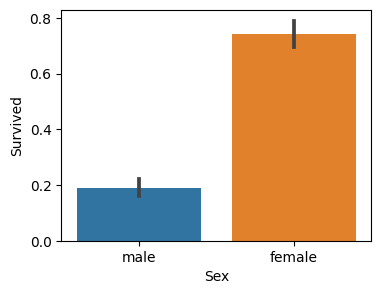

In [ ]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Sex',y='Survived',data=df,ax=ax)
plt.show()


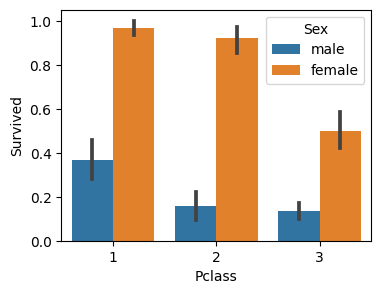

In [ ]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df,ax=ax)
plt.show()


In [ ]:
#age 값 종류가 많음 -> 범위별 분류해 카테고리값 할당
def get_age_category(age):
  cate=''
  if age<0: cate = 'Unknown'
  elif age<=5: cate = 'B'
  elif age<=12: cate = 'C'
  elif age<=18: cate = 'T'
  elif age<=25: cate = 'S'
  elif age<=35: cate = 'Y'
  elif age<=60: cate = 'A'
  else: cate = 'E'
  return cate



In [ ]:
df['Age']=df['Age'].apply(lambda x:get_age_category(x))
df['Age'].value_counts()

Y    373
A    195
S    162
T     70
B     44
C     25
E     22
Name: Age, dtype: int64

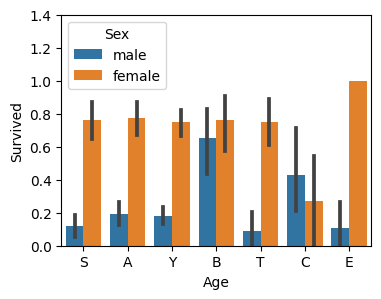

In [ ]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Age',y='Survived',hue='Sex',data=df,ax=ax)
plt.ylim(0,1.4)
plt.show()

In [ ]:
#범주형 데이터를 수치형 데이터로
def encode_features(df,columns):
    for column in columns:
        le = LabelEncoder()
        le.fit(df[column])
        df[column] = le.transform(df[column])
    return df


In [ ]:
df = encode_features(df,['Cabin','Sex','Embarked','Age'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 83.7+ KB


In [50]:
names_values=['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']

def get_name_index(name):
    first, second = name.split(',')
    foos = second.split('.')
    tn = foos[0].replace(' ','')
    for index in range(5):
        if tn == names_values[index]:
            return index
    return 5



In [52]:
df['Name']=df['Name'].apply(lambda x:get_name_index(x))
df['Name'].value_counts()


0    517
2    182
1    125
3     40
5     20
4      7
Name: Name, dtype: int64

In [54]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CN
PassengerId,1.000000,-0.005007,-0.035144,-0.013084,0.042939,-0.015596,-0.057527,-0.001652,0.012658,-0.035197,0.009305,-0.013084
Survived,-0.005007,1.000000,-0.338481,0.387512,-0.543351,-0.060861,-0.035322,0.081629,0.257307,-0.253658,-0.174963,0.387512
Pclass,-0.035144,-0.338481,1.000000,-0.144292,0.131900,0.244182,0.083081,0.018443,-0.549500,0.682176,0.197493,-0.144292
Name,-0.013084,0.387512,-0.144292,1.000000,-0.529582,-0.186745,0.238506,0.235903,0.134482,-0.135746,-0.088219,1.000000
Sex,0.042939,-0.543351,0.131900,-0.529582,1.000000,0.033941,-0.114631,-0.245489,-0.182333,0.095991,0.106395,-0.529582
Age,-0.015596,-0.060861,0.244182,-0.186745,0.033941,1.000000,-0.070245,-0.237680,-0.127453,0.184450,-0.025683,-0.186745
SibSp,-0.057527,-0.035322,0.083081,0.238506,-0.114631,-0.070245,1.000000,0.414838,0.159651,0.043525,0.068043,0.238506
Parch,-0.001652,0.081629,0.018443,0.235903,-0.245489,-0.237680,0.414838,1.000000,0.216225,-0.028179,0.032517,0.235903
Fare,0.012658,0.257307,-0.549500,0.134482,-0.182333,-0.127453,0.159651,0.216225,1.000000,-0.502569,-0.246359,0.134482
Cabin,-0.035197,-0.253658,0.682176,-0.135746,0.095991,0.184450,0.043525,-0.028179,-0.502569,1.000000,0.232192,-0.135746


In [57]:
df=df.drop(['PassengerId','Ticket'],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int64  
 9   Embarked  891 non-null    int64  
 10  CN        891 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 76.7 KB


# 가즈아


In [76]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'])

model= DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test,pred))

accuracy:  0.8161434977578476


In [77]:
model= RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test,pred))

accuracy:  0.8116591928251121


In [78]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test,pred))

accuracy:  0.7937219730941704


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
def exec_kfold(model,data,label,folds=5):
  print("\n",model.__class__.__name__)
  kfold = KFold(n_splits=folds)
  sm=[]
  for i, (train_index,test_index) in enumerate(kfold.split(df)):

      x_train,x_test = data.values[train_index],data.values[test_index]
      y_train,y_test = label.values[train_index],label.values[test_index]
      model.fit(x_train,y_train)
      pre = model.predict(x_test)
      score=accuracy_score(y_test,pre)
      sm.append(score)
      print(f"{i+1}번",score)
  mm=max(sm)-min(sm)
  print("평균:",np.mean(sm))
  print("최대오차값:",mm)


In [ ]:
data,label=df.drop('Survived',axis=1),df['Survived']
model1= DecisionTreeClassifier()
exec_kfold(model1,data,label)

model2= RandomForestClassifier()
exec_kfold(model2,data,label)

model3=LogisticRegression()
exec_kfold(model3,data,label)

In [ ]:
data,label=df.drop('Survived',axis=1),df['Survived']
model1= DecisionTreeClassifier()
print(np.mean(cross_val_score(model1,data,label,cv=5)))

model2= RandomForestClassifier()
print(np.mean(cross_val_score(model2,data,label,cv=5)))

model3=LogisticRegression()
print(np.mean(cross_val_score(model3,data,label,cv=5)))


In [94]:
parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[2,3,5,10,20]
}
model=RandomForestClassifier()
grid_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=5)
grid_model.fit(x_train,y_train)

print("최고 파라미터:",grid_model.best_params_)
print("최고 정확도:",grid_model.best_score_)

best_model = grid_model.best_estimator_
pred_val = best_model.predict(x_test)
print("acc:",accuracy_score(y_test,pred_val))


최고 파라미터: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도: 0.812972730333296
acc: 0.8251121076233184
